In [1]:
# @title Montar acceso Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title Rutas De Archivos
base_dir = "/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Base_Datos"
ruta_csv_labs     = f"{base_dir}/Laboratorios_limpio.csv"
ruta_csv_findrisk = f"{base_dir}/Findrisk_limpio.csv"

ruta_salida="/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Modelos_ML/"

In [3]:
# Load the Glucosa_Unique.csv dataset, filter to women, and preview
import pandas as pd

# Read CSV with provided encoding
file_path = "/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Glucosa_Unique.csv"


df_glu = pd.read_csv(file_path, encoding='utf-8')

# Basic cleaning: unify column names to lower for easier access
df_glu.columns = [str(c).strip() for c in df_glu.columns]

# Filter to female records; columns present include 'sexo' where 'F' appears in preview
df_women = df_glu[df_glu['sexo'].astype(str).str.upper().str.strip().isin(['F', 'FEMENINO'])].copy()

df_women

,Identificacion,Nombre_Completo,Edad_Años,Examen,Fecha_Examen,Grupo_Analito,Analito,Resultado,Regimen,identificacion,...,Dx_Diabetes_Tipo2_Familia,puntaje_total,Dm,tipo_dm,Consumo_Cigarrillo,Dx Enfermedad Cardiovascular,riesgo_dm,interpretacion,responsable_registro,servicio
0,1002793817,ANYI CATHERINE BOTOTO CHOCUE,25.0,Glucosa,2025-09-08,QUIMICA SANGUINEA,Glucosa,105.5,SUBSIDIADO,1002793817,...,"Si: Abuelos, Tios o Primos Hermanos (pero no P...",13.0,No,uno,1,no,17.0,Nivel Riesgo Moderado (Amarillo),Equipos basicos,Equipos Básicos
1,1006732340,LESLY JULIET CRUZ MANIHUARI,23.0,Glucosa,2025-09-01,QUIMICA SANGUINEA,Glucosa,112.7,SUBSIDIADO,1006732340,...,No,10.0,No,uno,1,no,4.0,Nivel Riesgo Ligeramente Elevado (Amarillo),Ana Elizabeth Delgado,Consulta Externa
2,1006842257,KAREN LORENA RAMIREZ ARIAS,27.0,Glucosa,2025-09-09,QUIMICA SANGUINEA,Glucosa,89.0,SUBSIDIADO,1006842257,...,No,6.0,No,uno,1,no,0.0,Nivel Riesgo Bajo (Verde),Angela ferrin,Centro Puesto de Salud
3,1006842959,ESNEDI YOLIMA HERNANDEZ HERNANDEZ,26.0,Glucosa,2025-09-05,QUIMICA SANGUINEA,Glucosa,89.4,SUBSIDIADO,1006842959,...,"Si: Abuelos, Tios o Primos Hermanos (pero no P...",10.0,No,uno,1,no,4.0,Nivel Riesgo Ligeramente Elevado (Amarillo),Ana Elizabeth Delgado,Consulta Externa
4,1006846193,KAREN MAYERLY MARTINEZ,24.0,Glucosa,2025-09-02,QUIMICA SANGUINEA,Glucosa,101.2,SUBSIDIADO,1006846193,...,No,8.0,No,uno,1,no,4.0,Nivel Riesgo Ligeramente Elevado (Amarillo),Ana Elizabeth Delgado,Consulta Externa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,69028061,CONSUELO SILVA ALVARADO,47.0,Glucosa,2025-09-03,QUIMICA SANGUINEA,Glucosa,97.1,SUBSIDIADO,69028061,...,"Si: Padres, Hermanos o Hijos",15.0,No,uno,1,no,33.0,Nivel Riesgo Alto (Rojo),Ana Elizabeth Delgado,Consulta Externa
96,69028393,MARIA DANIA MEZA,46.0,Glucosa,2025-09-09,QUIMICA SANGUINEA,Glucosa,98.7,SUBSIDIADO,69028393,...,No,4.0,No,uno,1,no,0.0,Nivel Riesgo Bajo (Verde),Michel Pardo - Victoria Quintero,Consulta Externa
97,69028799,LUZ DARY JURADO ORTEGA,47.0,Glucosa,2025-09-09,QUIMICA SANGUINEA,Glucosa,94.4,SUBSIDIADO,69028799,...,"Si: Padres, Hermanos o Hijos",17.0,No,uno,1,no,33.0,Nivel Riesgo Alto (Rojo),Ana Elizabeth Delgado,Consulta Externa
98,69028973,MARIA ELENA LAGOS RODRIGUEZ,53.0,Glucosa,2025-09-01,QUIMICA SANGUINEA,Glucosa,107.4,SUBSIDIADO,69028973,...,No,8.0,No,uno,1,no,4.0,Nivel Riesgo Ligeramente Elevado (Amarillo),karen valentina vallejos rodriguez,Equipos Básicos


# Modelos Machine Inicales

R² (test) = 0.280


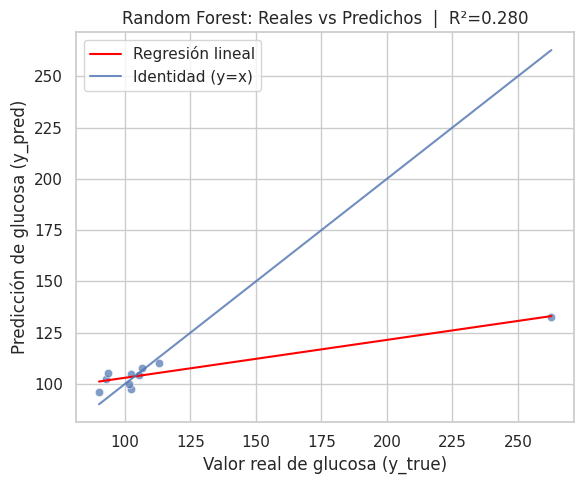

In [19]:
# ============================================================
# @title  RandomForestRegressor para predecir la glucosa (Resultado)
# en mujeres, con partición 70/30, cálculo de R² y gráfico
# y_true vs y_pred con línea de regresión (y línea identidad opcional).
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1) Punto de partida: se asume que ya existe df_women
#    (DataFrame previamente filtrado SOLO a mujeres).
#    Si también quieres asegurar que sea solo "Glucosa", podrías filtrar:
#    df_women = df_women[df_women['Analito'].str.contains('gluc', case=False, na=False)]
# ------------------------------------------------------------

# Nombre de la columna objetivo (valor de glucosa)
target_col = 'Resultado'

# 2) Quitar filas donde la variable objetivo esté vacía (NaN)
df_w = df_women.dropna(subset=[target_col]).copy()

# 3) Selección de columnas de entrada (features):
#    - Excluimos identificadores obvios, fechas y columnas que podrían fugar información
#      del propio resultado (como 'Analito' o 'Examen').
exclude_cols = [
    'Resultado', 'Identificacion', 'identificacion', 'Nombre_Completo', 'nombres',
    'apellidos', 'Fecha_Examen', 'Fecha_Fin_Registro', 'fecha_nacimiento',
    'responsable_registro', 'servicio', 'Examen', 'Analito'
]
# (Opcional) Añade aquí otras columnas derivadas del examen que puedan fugar info:
# leaky = ['interpretacion','Niveles_Altos_Glucosa','riesgo_dm','Dm','tipo_dm']
# exclude_cols += [c for c in leaky if c in df_w.columns]

feat_cols = [c for c in df_w.columns if c not in exclude_cols]

# 4) Separar X (features) e y (objetivo)
X = df_w[feat_cols]
# Si tus números pueden venir con coma decimal, usa:
# y = pd.to_numeric(df_w[target_col].astype(str).str.replace(",", ".", regex=False), errors='coerce')
y = pd.to_numeric(df_w[target_col], errors='coerce')

# 5) Quitar filas donde y no sea numérica después de la conversión
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

# 6) Identificar columnas numéricas y categóricas
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# 7) Preprocesamiento:
#    - Numéricas: imputación por mediana
#    - Categóricas: imputación por más frecuente + One-Hot Encoding
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# 8) Modelo: Random Forest (300 árboles, semilla fija para reproducibilidad)
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

# 9) Pipeline completo: preprocesamiento + modelo
model = Pipeline(steps=[('preprocess', preprocess), ('rf', rf)])

# 10) Partición 70/30 (train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

# 11) Entrenar el modelo
model.fit(X_train, y_train)

# 12) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 13) Métrica principal: R² (entre 0 y 1; más alto es mejor)
r2 = r2_score(y_test, y_pred)
print(f"R² (test) = {r2:.3f}")

# ------------------------------------------------------------
# 14) Gráfico de dispersión y_true vs y_pred
#     - Puntos: (y_real, y_predicha)
#     - Línea ROJA: regresión lineal simple para visualizar tendencia
#     - Línea AZUL (opcional): identidad y = x (predicción perfecta)
#     - El R² se muestra en el título.
# ------------------------------------------------------------
sns.set(style='whitegrid')
plt.figure(figsize=(6,5))

# Dispersión
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Línea de regresión (ROJA) para visualizar tendencia global
coef = np.polyfit(y_test, y_pred, 1)
poly1d_fn = np.poly1d(coef)
xs = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(xs, poly1d_fn(xs), color='red', label='Regresión lineal')

# (Opcional) Línea identidad y = x (AZUL) para comparar calibración
plt.plot(xs, xs, color='C0', alpha=0.8, label='Identidad (y=x)')

# Etiquetas y título con el R²
plt.xlabel('Valor real de glucosa (y_true)')
plt.ylabel('Predicción de glucosa (y_pred)')
plt.title(f'Random Forest: Reales vs Predichos  |  R²={r2:.3f}')

plt.legend()
plt.tight_layout()
plt.show()


Qué hace (de principio a fin)

1. **Punto de partida:** usa `df_women`, que ya viene filtrado a **mujeres**.
   *(Opcional: si existe `Analito`, podrías filtrar a “Glucosa”).*

2. **Objetivo (y):** toma la columna `Resultado` como valor de glucosa; elimina filas sin dato.

3. **Features (X):** usa todas las columnas **menos** identificadores, fechas y campos que podrían filtrar información del propio examen (`Resultado`, `Identificacion`, `Examen`, `Analito`, etc.).

4. **Tipos de variables:**

   * **Numéricas:** se imputan valores faltantes con **mediana**.
   * **Categóricas:** se imputan con **moda** y se codifican con **One-Hot** (ColumnTransformer).

5. **Modelo:** entrena un **RandomForestRegressor** (300 árboles, `random_state=42`) dentro de un **Pipeline** que primero preprocesa y luego ajusta.

6. **Partición 70/30:** `train_test_split(test_size=0.30, random_state=42)` para tener **entrenamiento** y **prueba**.

7. **Evaluación:** predice en el 30% de prueba y calcula **R²**.

   * **R²** ∈ \[−∞,1]: 1 es perfecto; 0 significa que no mejora a predecir la media; valores negativos indican peor que la media.

8. **Gráfica:**

   * Puntos = (valor real, predicción).
   * **Línea roja** = regresión lineal “visual” de esos puntos (solo referencia).
   * **(Opcional) Línea identidad** `y=x` = predicción perfecta.
   * El **R²** aparece en el **título** de la figura.

Cómo interpretarlo (rápido)

* Si los puntos se pegan a la **línea identidad**, el modelo **acierta**.
* Si la **línea roja** queda **por debajo** de la identidad en valores altos, el modelo **subestima** los altos (sesgo a la baja).
* Un **R²** consistente (>0.5, por ejemplo) sugiere que el modelo captura buena parte de la variabilidad; si es bajo, faltan features, hay ruido o outliers influyentes.

 Cómo contarlo a un público no técnico

> “Entrenamos un modelo de bosque aleatorio con el 70% de los datos y lo probamos con el 30% restante. El modelo aprende relaciones entre variables clínicas y el valor de glucosa. Medimos su desempeño con R² (qué tan bien explica la variación real). En la gráfica, cada punto compara el valor real vs la predicción; la línea azul sería el ideal (y=x) y la roja muestra la tendencia de nuestras predicciones. Un R² alto y puntos cerca de la línea indican buen ajuste.”

Buenas prácticas (para que el resultado sea confiable)

* **Evitar fuga de información:** no incluir columnas derivadas del mismo examen, p. ej. `interpretacion`, `Niveles_Altos_Glucosa`, `riesgo_dm`, `Dm`, `tipo_dm`.
* **Confirmar unidades/condición de la prueba** (ayuno/posprandial/OGTT) para casos extremos.
* **Repetibilidad:** `random_state=42` fija el split.
* **Robustez:** si te lo piden, haz **CV 5-fold** y reporta promedio de R².






[TRAIN] R2=0.859 | MAE=5.70 | RMSE=13.68 | n=90
[TEST ] R2=0.280 | MAE=17.15 | RMSE=41.58 | n=10


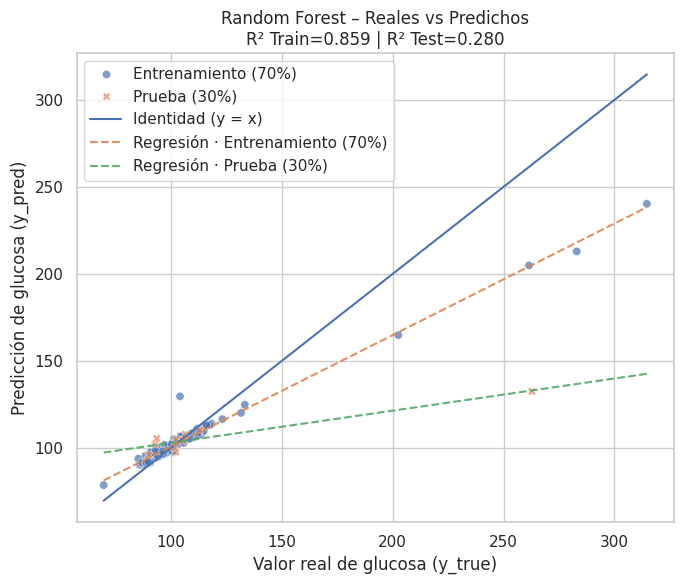

In [20]:
# ============================================
# @title Predicciones y métricas por split (Train/Test)
# + Gráfico conjunto con ambos splits
# ============================================
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1) Predicciones en train y test
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# 2) Métricas por split
r2_tr  = r2_score(y_train, y_pred_train)
mae_tr = mean_absolute_error(y_train, y_pred_train)
rmse_tr = float(np.sqrt(mean_squared_error(y_train, y_pred_train)))

r2_te  = r2_score(y_test, y_pred_test)
mae_te = mean_absolute_error(y_test, y_pred_test)
rmse_te = float(np.sqrt(mean_squared_error(y_test, y_pred_test)))

print(f"[TRAIN] R2={r2_tr:.3f} | MAE={mae_tr:.2f} | RMSE={rmse_tr:.2f} | n={len(y_train)}")
print(f"[TEST ] R2={r2_te:.3f} | MAE={mae_te:.2f} | RMSE={rmse_te:.2f} | n={len(y_test)}")

# 3) Armar DataFrame para graficar con seaborn
df_plot_train = pd.DataFrame({
    "y_true": y_train.values,
    "y_pred": y_pred_train,
    "split": "Entrenamiento (70%)"
})
df_plot_test = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred_test,
    "split": "Prueba (30%)"
})
df_plot = pd.concat([df_plot_train, df_plot_test], axis=0, ignore_index=True)

# 4) Rango común para la línea identidad y regresión
min_val = float(min(df_plot["y_true"].min(), df_plot["y_pred"].min()))
max_val = float(max(df_plot["y_true"].max(), df_plot["y_pred"].max()))
xs = np.linspace(min_val, max_val, 200)

# 5) Gráfico: puntos de ambos splits + línea identidad + (opcional) rectas de regresión por split
sns.set(style="whitegrid")
plt.figure(figsize=(7,6))

# Dispersión, diferenciando por split
sns.scatterplot(
    data=df_plot, x="y_true", y="y_pred",
    hue="split", style="split", alpha=0.7
)

# Línea identidad (predicción perfecta)
plt.plot(xs, xs, label="Identidad (y = x)")

# (Opcional) Regresión lineal por split para ver sesgo
for etiqueta, data_sub in df_plot.groupby("split"):
    coef = np.polyfit(data_sub["y_true"], data_sub["y_pred"], 1)
    y_line = np.poly1d(coef)(xs)
    plt.plot(xs, y_line, linestyle="--", alpha=0.9, label=f"Regresión · {etiqueta}")

# Título con R² de ambos splits
plt.title(
    f"Random Forest – Reales vs Predichos\n"
    f"R² Train={r2_tr:.3f} | R² Test={r2_te:.3f}"
)
plt.xlabel("Valor real de glucosa (y_true)")
plt.ylabel("Predicción de glucosa (y_pred)")
plt.legend()
plt.tight_layout()
plt.show()



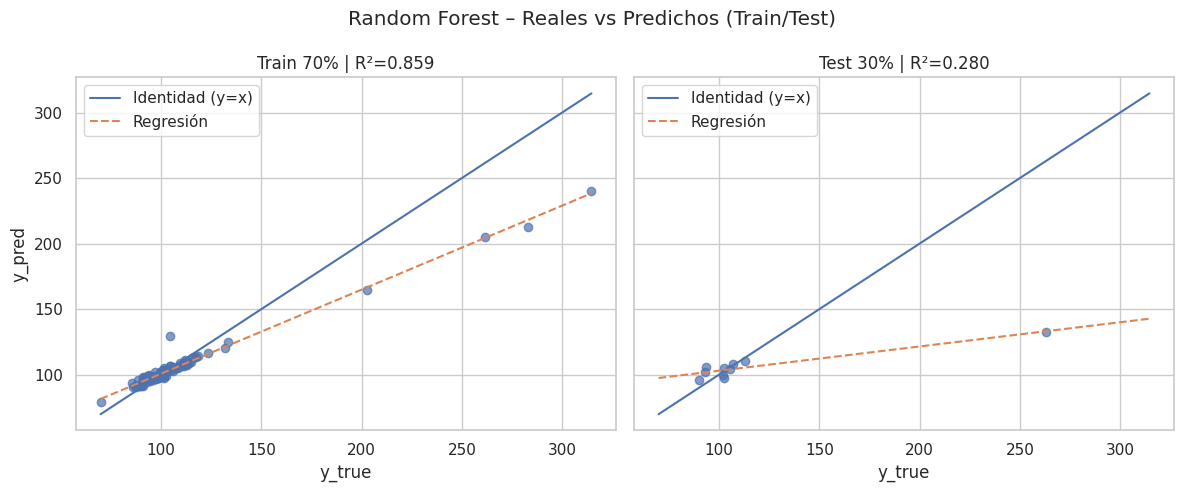

In [21]:
# @title Graficos separados

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

# TRAIN
axes[0].scatter(y_train, y_pred_train, alpha=0.7)
axes[0].plot(xs, xs, label="Identidad (y=x)")
coef_tr = np.polyfit(y_train, y_pred_train, 1)
axes[0].plot(xs, np.poly1d(coef_tr)(xs), linestyle="--", label="Regresión")
axes[0].set_title(f"Train 70% | R²={r2_tr:.3f}")
axes[0].set_xlabel("y_true")
axes[0].set_ylabel("y_pred")
axes[0].legend()

# TEST
axes[1].scatter(y_test, y_pred_test, alpha=0.7)
axes[1].plot(xs, xs, label="Identidad (y=x)")
coef_te = np.polyfit(y_test, y_pred_test, 1)
axes[1].plot(xs, np.poly1d(coef_te)(xs), linestyle="--", label="Regresión")
axes[1].set_title(f"Test 30% | R²={r2_te:.3f}")
axes[1].set_xlabel("y_true")
axes[1].legend()

plt.suptitle("Random Forest – Reales vs Predichos (Train/Test)")
plt.tight_layout()
plt.show()



In [15]:
# @title Exportar SOLO el modelo en formato .joblib a tu Drive
from google.colab import drive
import os, joblib
from datetime import datetime

# Montar Drive (si no está)


OUTPUT_DIR = "/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Algoritmos/Delfos|A1C1"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Nombre con timestamp para versionar
ts = datetime.now().strftime("%Y%m%d")
MODEL_PATH = os.path.join(OUTPUT_DIR, f"RF_GlucosaMujeres_{ts}.joblib")

# Guarda el pipeline completo (prepro + modelo)
joblib.dump(model, MODEL_PATH, compress=3)

print("Modelo guardado en:", MODEL_PATH)


Modelo guardado en: /content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Algoritmos/Delfos|A1C1/RF_GlucosaMujeres_20250922.joblib


# Pruebas Modelo Con datos

In [22]:
# ============================================================
# @title  Ingresar datos MANUALMENTE y predecir con .joblib
# - Pide peso y talla y calcula IMC automáticamente
# ============================================================
import os, numpy as np, pandas as pd, joblib

# 1) Cargar el modelo (pipeline completo)
MODEL_PATH = "/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Algoritmos/Delfos|A1C1/RF_GlucosaMujeres_20250917.joblib"  # <-- cambia por tu ruta real
pipe = joblib.load(MODEL_PATH)
print("Modelo cargado desde:", MODEL_PATH)

# 2) Descubrir columnas esperadas
pre = pipe.named_steps['preprocess']
num_cols, cat_cols = [], []
for name, transformer, cols in pre.transformers_:
    if name == 'num':
        num_cols = list(cols)
    elif name == 'cat':
        cat_cols = list(cols)
feature_cols = num_cols + cat_cols
print(f"Features esperadas: {len(feature_cols)}")

# (Opcional) categorías conocidas de cada variable categórica
categories_map = {}
try:
    ohe = pre.named_transformers_['cat'].named_steps.get('onehot', None)
    if ohe is not None:
        categories_map = {col: list(cats) for col, cats in zip(cat_cols, ohe.categories_)}
except Exception:
    pass

# 3) Columnas que VAS a digitar manualmente:
#    (quitamos 'imc' y en su lugar pedimos 'peso' y 'talla')
FEATURES_TO_ASK = [
    "edad", "tas", "tad", "perimetro_abdominal",
    "peso", "talla",                  # <-- se piden y de ahí se calcula IMC
    "realiza_ejercicio", "frecuencia_frutas", "medicamentos_hta"
]
FEATURES_TO_ASK = [c for c in FEATURES_TO_ASK if c in feature_cols or c in ["peso","talla"]]
assert len(FEATURES_TO_ASK) > 0, "Ninguna de las FEATURES_TO_ASK está en el modelo. Revisa nombres."

def ask_value(col):
    """Pregunta el valor de una columna; devuelve float para numéricas y str para categóricas."""
    is_num = (col in num_cols) or (col in ["peso","talla"])  # tratamos peso/talla como numéricos
    prompt = f"- {col} ({'num' if is_num else 'cat'})"
    if not is_num and col in categories_map and len(categories_map[col]) <= 12:
        prompt += f" | opciones: {categories_map[col]}"
    prompt += " -> "
    val = input(prompt).strip()
    if val == "":
        return None
    if is_num:
        val = val.replace(",", ".")
        try:
            return float(val)
        except:
            print(f"⚠️ No pude convertir '{val}' en número. Se usará NaN.")
            return None
    else:
        return val

def compute_imc_from(peso, talla):
    """Calcula IMC (= kg / m^2). Si talla > 3, se asume cm para el cálculo."""
    if peso is None or talla is None:
        return None
    try:
        p = float(peso)
        t = float(talla)
        t_m = t/100.0 if t > 3 else t  # si parece cm, convierto a m SOLO para el IMC
        if p <= 0 or t_m <= 0:
            return None
        return round(p / (t_m**2), 2)
    except Exception:
        return None

def prepare_row(input_dict):
    """Alinea un dict a las columnas que espera el modelo y calcula IMC si aplica."""
    row = {c: np.nan for c in feature_cols}
    # Copiar valores solo si están en las features esperadas
    for k, v in input_dict.items():
        if k in row:
            row[k] = v
    # Calcular IMC si la columna 'imc' existe en el modelo
    if "imc" in feature_cols:
        imc_val = compute_imc_from(input_dict.get("peso"), input_dict.get("talla"))
        if imc_val is not None:
            row["imc"] = imc_val
            print(f"ℹ️ IMC calculado automáticamente: {imc_val}")
        else:
            print("⚠️ No se pudo calcular IMC (faltan datos o valores inválidos).")
    # Coerción numérica para columnas numéricas
    df_one = pd.DataFrame([row])
    for c in num_cols:
        df_one[c] = pd.to_numeric(df_one[c], errors="coerce")
    return df_one

print("\n💡 Nota: ingresa 'talla' en las MISMAS unidades usadas al entrenar el modelo (probablemente cm).")
print("El IMC se calcula en base a metros (si escribes cm, el cálculo lo convierte a m automáticamente).")

# 4) Bucle interactivo
while True:
    print("\n=== Ingreso manual de datos (Enter para dejar en blanco) ===")
    answers = {}
    for col in FEATURES_TO_ASK:
        answers[col] = ask_value(col)

    X_one = prepare_row(answers)
    y_pred = float(pipe.predict(X_one)[0])
    print(f"\n✅ Predicción esperada de glucosa: {y_pred:.2f} mg/dL")

    cont = input("\n¿Otra predicción? (s/n): ").strip().lower()
    if cont != "s":
        break


Modelo cargado desde: /content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Algoritmos/Delfos|A1C1/RF_GlucosaMujeres_20250917.joblib
Features esperadas: 38

💡 Nota: ingresa 'talla' en las MISMAS unidades usadas al entrenar el modelo (probablemente cm).
El IMC se calcula en base a metros (si escribes cm, el cálculo lo convierte a m automáticamente).

=== Ingreso manual de datos (Enter para dejar en blanco) ===
- edad (num) -> 33
- tas (num) -> 120
- tad (num) -> 60
- perimetro_abdominal (num) -> 85
- peso (num) -> 70
- talla (num) -> 173
- realiza_ejercicio (cat) | opciones: ['NO', 'SI'] -> no
- frecuencia_frutas (cat) | opciones: ['NO', 'SI'] -> no
- medicamentos_hta (cat) | opciones: ['NO', 'SI'] -> no
ℹ️ IMC calculado automáticamente: 23.39

✅ Predicción esperada de glucosa: 95.92 mg/dL

¿Otra predicción? (s/n): b
